# ДЗ №2 - обучение модели трехслойного перцептрона методом градиентного спуска

## (1)
В качестве теоретического задания в этом ДЗ предлагается провести вывод функции ошибки для задачи регрессии в предположении, что целевая переменная подчиняется распределению Лапласа. Также предлагается воспользоваться байесовским выводом и в том же предположении относительно распределения целевой переменной вывести форму функции потерь с условием лапласовского априорного распределения параметров модели.

Запишем формулу Байеса: 
$$ P(\theta | X) = \frac{P \left( X| \theta \right) P(\theta)}{P(X)} $$
тут $ P(X| \theta) $ - правдоподобие (likelihood)

$ P(\theta)$ - prior

$ P(X) $ - evidence

Мы знаем, что решаем задачу регрессии и предполагаем, что целевая переменная подчиняется распределению Лапласа: $$
g(x)=\frac{\alpha}{2} e^{-\alpha|x-\beta|}, \quad-\infty<x<+\infty
$$

$$ f(x) = \theta^T X + g(x)$$

Для простоты считаем, что $ \beta = 0$

$$ P(t| X, \theta, \alpha) = \frac{\alpha}{2} e^{-\alpha|t - \theta^T X| } $$

$$ \theta^* = \mathbf{argmax} \prod\limits_{i = 1}^{n} \left( \frac{\alpha}{2} e^{-\alpha|t - \theta^T X| } \right)$$

логарифмируем, чтобы перейти к сумме

$$ \theta^* = n \ln \frac{\alpha}{2} +  \ln \prod\limits_{i = 1}^{n} \left(  e^{-\alpha|t - \theta^T X| } \right) = n \ln \frac{\alpha}{2} + \sum\limits_{i = 1}^{n} \ln \left(  e^{-\alpha|t - \theta^T X| } \right) $$

$$ = n \ln \frac{\alpha}{2} - \alpha \sum\limits_{i = 1}^{n} |t - \theta^T X|$$

Получили известную функцию ошибки MAE (минимизируем сумму модулей: $ \sum\limits_{i = 1}^{n} |t - \theta^T X| $ )

Для Байевского вывода предполагаем, что целевая переменная и параметры распределены по Лапласу

$$ P(\theta | t) = P(t | X, \theta, \alpha) P(\theta) $$ (не учитываем evidence, так как он не зависит от параметров нашей модели)

Снова логарифмируем, получаем:

$$ \ln P(\theta | t) = \frac{1}{\alpha} \sum\limits_{i = 1}^{n} |t - \theta^T X| + \frac{\alpha}{2} |\theta| + const   $$

То есть в таких задачах (когда и целевая переменная и параметры распределены по Лапласу) стоит использовать L1 регуляризацию 

## (2)
В этом ДЗ предлагается реализовать модель трехслойного перцептрона и обучение этой модели методом градиентного спуска.

На этот раз предлагается работать с реальными данными. Данные представляют из себя набор рукописных цифр. Это изображения размером 28х28. Каждому изображению поставлен в соответствие класс - арабская цифра. Задача модели - определить цифру, соответствующую произвольному изображению из тестового набора данных.

Так же, как и в ДЗ №1, предлагается реализовать функцию потерь и саму модель перцептрона в манере, схожей с построением модулей фреймворка pytorch.

В решении ожидается наличие следующих ключевых составляющих:<br />

- (текст) формулировка задачи
- (текст) формулировка признакового описания объектов
- (текст) формулировка функции ошибки
- (текст) формулировка меры качества модели
- (текст, код и диаграммы) исследование исходных данных: распределение признаков и другие действия, дающие понимание о характере исходных данных
- (текст, код, диаграммы) фильтрация признаков (при необходимости), порождение признаков (при необходимости)
- (код, результаты, коммментарии) обучение модели методом градиентного спуска
- (код, результаты, комментарии) оценка качества модели на валидационной выборке

#### Код решения:
(можно использовать предлагаемые шаблоны)
- формулировка модели трехслойного перцептрона (имеется в виду только один скрытый слой);
- формулировка функции ошибки;
- формулировка метрики (метрик);
- формулировка цикла оптимизации параметров.

#### Визуализация в решении:
- распределение признаков;
- распределение целевой переменной;
- отдельные экземпляры выборки в виде изображений;
- эволюция функции ошибки по ходу обучения;
- эволюция метрики(метрик) по ходу обучения

#### Выводы
- вывод о достаточности или избыточности данных для оценки параметров модели
- вывод о соотношении выразительности модели и ее обобщающей способности (наблюдаются ли явления переобучения или недообучения).

Примечание:<br />
Реализация перцептрона и других составляющих исследования может быть написана только с использованием библиотеки Numpy или scipy. Решения с использованием библиотек автоматического вычисления градиентов не засчитываются.

### Исходные данные

Исходные данные можно скачать [по этой ссылке](https://www.dropbox.com/s/y6ar7i7mb6fvoed/mnist.npz). Набор данных MNIST поставляется в различных вариантах. В варианте, доступном по приведенной ссылке, чтение исходных данных может быть выполнено следующим образом:

```
import numpy as np
mnist = np.load('mnist.npz')
x_train = mnist['x_train']
y_train = mnist['y_train']
x_test = mnist['x_test']
y_test = mnist['y_test']
```

### Многослойный перцептрон

Напомним, мы задаем мнолослойный перцептрон как сложную функцию, в которой используются линейные операции и поточечные нелинейные преобразования. Если входные данные (признаковое описание объекта) заданы вектором $x$, то функция перцептрона с одним скрытым слоем выглядит следующим образом:
$$
F(x) = \Psi\left(\phi\left( {x}\cdot\theta_1 + b_1 \right)\cdot\theta_2 + b_2\right),
$$
где $x$ имеется в виду без дополнительного единичного признака; $\phi$ - функция активации скрытого слоя; $\Psi$ - функция активации выходного слоя перцептрона.

Напомним также, что в задаче жесткой многоклассовой классификации на $K$ классов допустим вариант формулировки модели, такой что:
- количество признаков целевой переменной совпадает с количеством классов $K$;
- в качестве функции активации $\Psi$ может использоваться `softmax`:
$$
\Psi(h_i) = \frac{e^{h_i}}{\sum_{j=1}^{K}{e^{h_j}}}
$$
- в качестве функции потерь может использоваться перектрестная энтропия в многоклассовом варианте (приведено в записи для одного объекта):
$$
{\mathscr{L}}\left(\hat{y},y\right) = \sum_{j=1}^{K}{y_j*ln\left(\hat{y}_j\right)},
$$
где $\hat{y}=F(x)$

В своем решении вы никак не ограничены в выборе функций активации $\phi$ или $\Psi$. Однако есть некоторые устоявшиеся практики применения функций `ReLU, sigmoid, tanh`.

### Особенности реализации функции `softmax`
Несложно заметить, что как в числителе, так и в знаменателе функции `softmax` стоит экспонента некоторого числа. При этом следует понимать, что разрядность чисел с плавающей точкой `float32`, `float64` и даже `float128` не бесконечны. Свойства экспоненты таковы, что, например, для переполнения разрядности чисел `float64` (максимум  $\sim1.78*10^{308}$) достаточно показателя, превышающего 710, что совсем немного. Поэтому в случае практической реализации функции `softmax` имеет смысл предусмотреть случаи, когда аргументы экспоненты велики или, наоборот, слишком малы.

В этом ДЗ кроме прочих заданий вам нужно реализовать вычислительно стабильную версию `softmax`.

### Особенности вычисления градиента функции потерь

В этом домашнем задании, также как и в ДЗ№1 предлагается реализовывать функцию потерь и отдельные вычислительные блоки перцептрона наследующими `Differentiable` для общности восприятия этих модулей как дифференцируемых по своим аргументам. По желанию можно вычислить градиент функции потерь по параметрам модели вручную (и далее реализовать его в коде), однако предпочитаемым способом будет реализация градиента каждого из вычислительных блоков по аргументу в методе `backward()` и использование этого результата в обобщенном виде, без упрощения. Этот вариант вычисления градиента функции потерь по параметрам модели называется "backpropagation" ("метод обратного распространения ошибки" или "метод обратной волны" у разных авторов).

Нелишним будет напомнить, что в некоторых случаях для вычисления компоненты градиента необходимо хранить значения, полученные на этапе вычисления функции $F(x)$. В вашем решении это может быть устроено по-разному. Но для тех, кто хочет придерживаться предложенного шаблона, введен атрибут `state` класса `Differentiable`.

# Моё решение

In [1]:
import numpy as np
from tqdm import tqdm

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
mnist = np.load('./mnist.npz')
x_train = mnist['x_train']
y_train = mnist['y_train']
# Обратите внимание на то, что целевая переменная в виде целых чисел от 0 до 9, в то время как в формулах,
# приведенных выше, подразумевается one-hot кодирование целевой переменной
x_test = mnist['x_test']
y_test = mnist['y_test']

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

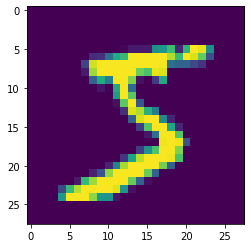

5


In [7]:
plt.imshow(x_train[0, :, :]) # пример данных
plt.show()
print(y_train[0]) # такргетное значение

In [8]:
X_train = x_train.reshape([-1, 28 * 28]) # переводим трёхмерный тензор в двумерный
X_test = x_test.reshape([-1, 28 * 28])

In [9]:
X_train.shape

(60000, 784)

In [77]:
class Differentiable:
    def __init__(self):
        self.state = None
        pass
    
    def forward(self, **kwargs):
        raise NotImplementedError()
    
    def backward(self, **kwargs):
        raise NotImplementedError()

в качестве функции потерь используем перектрестную энтропию в многоклассовом варианте:
$$
{\mathscr{L}}\left(\hat{y},y\right) = \sum_{j=1}^{K}{y_j*ln\left(\hat{y}_j\right)},
$$
где $\hat{y}=F(x)$, то есть вероятность принадлежать классу, которую предсказывает наша модель. В векторном виде $\vec{y^T}  \ln \vec{\hat{y}}$. Градиент по входному значению $ \vec{\hat{y}} $ равен $ \frac{\vec{y}}{\hat{y}} $

In [118]:
class loss(Differentiable):
    def __init__(self):
        super(loss, self).__init__()
        
    def __call__(self, y_true, y_pred):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(y_true, y_pred)
    
    def forward(self, y_true, y_pred):
        # Этот метод реализует вычисление значения функции потерь
        # Подсказка: метод должен возвращать единственный скаляр - значение функции потерь
        loss_value = 0.0
        self.state = 0.0
        
        ### YOUR CODE HERE
        y_predT = np.log(y_pred).T
        loss_value = sum(y_true.dot(y_predT)[0])
                
        return -loss_value
    
    
    def backward(self, y_true, y_pred):
        # Этот метод реализует вычисление градиента функции потерь по аргументу y_pred
        # Подсказка: метод должен возвращать вектор градиента функции потерь
        #           размерностью, совпадающей с размерностью аргумента y_pred
        
        partial_grad = np.zeros_like(y_pred)
        
        ### YOUR CODE HERE
        #print(y_true.shape)
        #print(y_true)
        
        partial_grad = -y_true / y_pred
        
        return partial_grad

Этот класс мы прописали в предыдущем задании. Только теперь в backward реализуем вычисление градиента абстрактно от входного вектора

In [119]:
class Linear(Differentiable):
    def __init__(self):
        super(Linear, self).__init__()
        self.theta = None
    
    def __call__(self, X):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, y_in):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        partial_grad = 0.0
        
        ### YOUR CODE HERE
        partial_grad = y_in
        
        return partial_grad
    
    def forward(self, X):
        # этот метод предназначен для применения модели к данным
        assert X.ndim == 2, "X should be 2-dimensional: (N of objects, n of features)"
        
        if (self.theta is None):
            # Если вектор параметров еще не инициализирован, его следует инициализировать
            # Подсказка: длина вектора параметров может быть получена из размера матрицы X
            self.theta = np.random.normal(scale=0.01, size = (X.shape[1], 100))
        
        
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy
        
        y_pred = 0.0
        y_pred = X.dot(self.theta)
        self.state = y_pred # сохраняем результат вычисления функции на данном этапе
        
        return y_pred

In [120]:
class Linear_2(Differentiable):
    def __init__(self):
        super(Linear_2, self).__init__()
        self.theta = None
    
    def __call__(self, X):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, y_in, flag):
        # Этот метод реализует вычисление компоненты градиента функции потерь

        partial_grad = 0.0
        
        if (flag == 1): # градиент по параметрам 
            partial_grad = y_in
        else:
            partial_grad = self.theta
        
        return partial_grad
    
    def forward(self, X):
        # этот метод предназначен для применения модели к данным
        assert X.ndim == 2, "X should be 2-dimensional: (N of objects, n of features)"
        
        if (self.theta is None):
            # Если вектор параметров еще не инициализирован, его следует инициализировать
            # Подсказка: длина вектора параметров может быть получена из размера матрицы X
            self.theta = np.random.normal(scale=0.01, size = (100, 10))
        
        
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy
        
        y_pred = 0.0
        y_pred =  X.dot(self.theta)
        self.state = y_pred # сохраняем результат вычисления функции на данном этапе
        
        return y_pred

Возьмём функцию активации `sigmoid`

$$\begin{equation}sigmoid=\frac{1}{1+e^{-x}}\end{equation}$$
Градиент этой функции находится следующим образом:
$$ \begin{equation}\frac{d (sigmoid)}{d x}=-\frac{1}{\left(1+e^{-x}\right)^{2}}\left(-e^{-x}\right)=\frac{e^{-x}}{\left(1+e^{-x}\right)^{2}}\end{equation} $$

$$\begin{equation}=\frac{1}{1+e^{-x}}\left(1-\frac{1}{1+e^{-x}}\right)=sigmoid(x)(1-sigmoid(x))\end{equation} $$

In [121]:
class Activation(Differentiable):
    def __init__(self):
        super(Activation, self).__init__()
    
    def __call__(self, X):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, y_in):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        partial_grad = 0.0
        
        ### YOUR CODE HERE
        self.activ = Activation()
        partial_grad = self.activ.forward(y_in) * (1 - self.activ.forward(y_in))
        
        return partial_grad
    
    def forward(self, y_in):
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy
        
        
        y_pred = 1.0/(1.0 + np.exp(-y_in))
        self.state = y_pred # сохраняем результат вычисления функции на данном этапе
        return y_pred

в качестве функции активации $\Psi$ используем `softmax`:
$$
\Psi(h_i) = \frac{e^{h_i}}{\sum_{j=1}^{K}{e^{h_j}}}
$$
Как описано в условии задания `softmax` не численно стабильный и нужно рассмотреть случаи, когда показатель экспоненты либо очень большое число, или наоборот достаточно маленькое.

Для защиты от этого воспользуемся свойством `softmax`, что $softmax(x) = softmax(x+c)$ для любой константы $c$. Следовательно, можем вычисть максимальный элемент в исходном векторе из всех элементов, то есть для входного вектора $x$ определим $z$ так, чтобы: $z = x - \max(x) $ и затем будем брать `softmax` от вектора z, который будет стабильным 

Вычисляем градиент от `softmax`: 

$$\begin{equation}\frac{\partial \operatorname{smax}\left(x_{i}\right)}{\partial x_{i}}=\frac{f^{\prime}(x) g(x)-f(x) g^{\prime}(x)}{g(x)^{2}}\end{equation} $$

$$ \begin{equation}=\frac{e^{x_{i}} \sum_{j=1}^{|X|} e^{x_{j}}-e^{x_{i}} \frac{\partial}{x_{i}} \sum_{j=1}^{|X|} e^{x_{j}}}{\left(\sum_{j=1}^{|X|} e^{x_{j}}\right)^{2}}\end{equation} $$

$$\begin{equation}=\frac{e^{x_{i}} \sum_{j=1}^{|X|} e^{x_{j}}-\left(e^{x_{i}}\right)^{2}}{\left(\sum_{j=1}^{|X|} e^{x_{j}}\right)^{2}}\end{equation} $$

$$ \begin{equation}=\left(\frac{e^{x_{i}}}{\sum_{j=1}^{|X|} e^{x_{j}}} \frac{\sum_{j=1}^{|X|} e^{x_{j}}}{\sum_{j=1}^{|X|} e^{x_{j}}}\right)-\left(\frac{e^{x_{i}}}{\sum_{j=1}^{|X|} e^{x_{j}}} \frac{e^{x_{i}}}{\sum_{j=1}^{|X|} e^{x_{j}}}\right)\end{equation}$$

$$ \begin{equation}=\frac{e^{x_{i}}}{\sum_{j=1}^{|X|} e^{x_{j}}}\left(1-\frac{e^{x_{i}}}{\sum_{j=1}^{|X|} e^{x_{j}}}\right)\end{equation}$$

$$\begin{equation}=\operatorname{smax}\left(x_{i}\right)\left(1-\operatorname{smax}\left(x_{i}\right)\right)\end{equation} $$


В numpy: $smax(\vec{x}) \times (1 - smax(\vec{x}))$ 

In [122]:
class Softmax(Differentiable):
    def __init__(self):
        super(Softmax, self).__init__()
        self.theta = None
    
    def __call__(self, X):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, y_in):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        partial_grad = 0.0
        
        ### YOUR CODE HERE
        self.sm = Softmax()
        partial_grad = self.sm.forward(y_in) * (1 - self.sm.forward(y_in))
        return partial_grad
    
    def forward(self, y_in):  
        y_pred = np.zeros_like(y_in)
        i = 0
        for string in y_in:
            z = string - np.max(string) #для того чтобы сделать softmax численно стабильным
            denominator = 0.0
            for el in z:
                denominator += np.exp(el)

            y_pred[i] = [np.exp(a) / denominator for a in z]
            i += 1
        self.state = y_pred # сохраняем результат вычисления функции на данном этапе
        return y_pred

Напишем нашу модель

In [165]:
class Perceptron(Differentiable):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.lin_1 = Linear()
        self.lin_2 = Linear_2()
        self.psi   = Softmax()
        self.fi    = Activation()
        self.modules = [self.lin_1, self.fi, self.lin_2, self.psi] # список в каком порядке вычисляется функция
        self.parameters = [self.lin_1.theta, self.lin_2.theta] # список параметров
    
    def __call__(self, X):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, X, loss_backward):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        #grad = [0.0, 0.0]
        
        
        grad_theta2 = self.lin_2.backward(self.fi.state,1).T.dot(self.psi.backward(self.lin_2.state) * loss_backward)
        #print(grad[0].shape)
        grad_fitrst_part = (loss_backward * self.psi.backward(self.lin_2.state)).dot(self.lin_2.backward(self.fi.state,0).T) * self.fi.backward(self.lin_1.state)
        grad_second_part = self.lin_1.backward(X).T.dot(grad_fitrst_part) 
        grad_theta1 = grad_second_part
        #print(grad[1].shape)
        
        #partial_grad = grad
        self.parameters = [self.lin_1.theta, self.lin_2.theta]
        
        return grad_theta1, grad_theta2
    
    def forward(self, X):
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy
        
        y_pred = X

        if (self.lin_2.theta is not None):
            self.lin_1.theta = self.parameters[0]
            self.lin_2.theta = self.parameters[1]
    
        for el in self.modules:
            #print(y_pred.shape)
            y_pred = el.forward(y_pred)

        self.parameters[0] = self.lin_1.theta
        self.parameters[1] = self.lin_2.theta
        #print(self.lin_2.theta)
        
        
        return y_pred

Задаём шаг градиентного спуска

In [166]:
lr = 10e-6

In [167]:
batch_size = 5000 # выбираем размер батча

Данные все не влезают в память и выходит ошибка memory error, поэтому бьём на батчи, после каждого прохода по данным, то есть после каждой эпохи. Подробные комментарии есть в самом коде.

In [174]:
def train_loop(X, y, model, loss_fn, x_test, y_test, epochs=10):
    loss_history = []
    loss_history_test = []
    pbar = tqdm(total=epochs)
    for epoch in range(epochs):
        
        order = np.random.permutation(len(X)) # каждую эпоху перемешиваем
                # порядок примеров
        batch_loss = []
        for start_index in range(0, len(X), batch_size): # градиентый шаг делаем для train данных размера batch
            batch_indexes = order[start_index:start_index+batch_size]
            
            X_batch = X[batch_indexes]
            y_batch = y[batch_indexes]

            y_pred = model(X_batch) # получили y_pred, что предсказала наша модель
            loss_value = loss_fn(y_batch, y_pred)
            print(loss_value)
            loss_backward = loss_fn.backward(y_batch,y_pred) # подсчитали градиент в лоссе
            #print(loss_backward.shape)
            grad_theta1, grad_theta2 = model.backward(X_batch, loss_backward)

            model.parameters[0] = model.parameters[0] - lr * grad_theta1 # сделали градиентный шаг
            model.parameters[1] = model.parameters[1] - lr * grad_theta2
            
            batch_loss.append(loss_value)
        y_pred_test = model(x_test)
        test_loss = loss_fn(y_test, y_pred_test) # считаем лосс на тесте после каждой эпохи
        loss_history_test.append(test_loss)
        loss_history.append(np.mean(batch_loss)) # усредняем лосс по батчам, чтобы получить лосс за 1 эпоху
        pbar.update(1)
        pbar.set_postfix({'loss': np.mean(batch_loss)})
    pbar.close()
    return loss_history, loss_history_test

Добавляем баес для тестовой матрицы

In [175]:
bias = np.ones((X_train.shape[0], 1))
Xtr = np.hstack((X_train, bias))

Для того, чтобы использовать софтмакс на выходе делаем onehot encoding

In [176]:
def To_one_hot_encoding(y):
    y_one_hot = np.zeros((y.shape[0], 10))
    for i in range(len(y_one_hot)):
        y_one_hot[i][y[i]] = 1
    return y_one_hot

In [177]:
y_train = np.array(y_train)
y_train_one_hot = To_one_hot_encoding(y_train)
y_test = np.array(y_test)
y_test_one_hot = To_one_hot_encoding(y_test)
print(y_train_one_hot[0])
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


In [178]:
bias = np.ones((X_test.shape[0], 1))
Xtest = np.hstack((X_test, bias))
Xtest.shape

(10000, 785)

Начинаем обучение

In [179]:
obj_fn = loss()
model = Perceptron()
train_loss_history, test_loss_history = train_loop(Xtr, y_train_one_hot, model, obj_fn, Xtest, y_test_one_hot, epochs=20)




















  0%|          | 0/20 [00:00<?, ?it/s]

11619.00957534076
11663.048563531844
11048.635988119564
11758.938213053958
11892.506959251508
10947.199947364163
11165.56704081825
11583.211064889872
10352.84407750587
11201.083398267067
9847.594913876357
11705.945933119943





















  5%|▌         | 1/20 [00:24<07:45, 24.47s/it]


















  5%|▌         | 1/20 [00:24<07:45, 24.47s/it, loss=1.12e+4]

11977.968011177476
11855.4149149035
12129.938786467286
11138.938483849652
11020.804018910801
12473.083740361762
12361.847128824656
11646.317446527102
10987.122769714908
11705.953105276589
11876.18682490475
8330.034656280643





















 10%|█         | 2/20 [00:47<07:10, 23.90s/it, loss=1.12e+4]


















 10%|█         | 2/20 [00:47<07:10, 23.90s/it, loss=1.15e+4]

11876.175234646977
11745.569980515907
12005.496523846292
10674.851331052345
12373.41471661789
12297.43156746017
12543.98612499598
12199.085376674397
10990.154967368506
10481.424867336782
15867.086186058736
12343.233034080884





















 15%|█▌        | 3/20 [01:09<06:36, 23.34s/it, loss=1.15e+4]


















 15%|█▌        | 3/20 [01:09<06:36, 23.34s/it, loss=1.21e+4]

12402.640847174178
12593.655228583673
10818.456507670575
12070.620060797857
12164.710794824123
12557.164909630555
12613.36288893578
12444.937402365766
10817.233389325966
8003.34253288545
17035.388362716436
12049.99837342205





















 20%|██        | 4/20 [01:30<06:04, 22.77s/it, loss=1.21e+4]


















 20%|██        | 4/20 [01:30<06:04, 22.77s/it, loss=1.21e+4]

7983.909853051819
12276.183125134661
12741.464616404106
12385.14623246953
8020.401232240738
10691.497942057807
10074.272212914935
12863.253615702191
11662.806199550327
12912.612429526638
12572.46140721228
11936.718426721442





















 25%|██▌       | 5/20 [01:52<05:39, 22.62s/it, loss=1.21e+4]


















 25%|██▌       | 5/20 [01:52<05:39, 22.62s/it, loss=1.13e+4]

11896.051391724966
10082.881556975191
8010.707764635213
10670.766336355378
17958.490908916854
8031.333530224453
11854.504616154543
12063.411792738898
12841.799202851633
11889.181995727275
10051.880817318406
12613.052191146931





















 30%|███       | 6/20 [02:14<05:14, 22.43s/it, loss=1.13e+4]


















 30%|███       | 6/20 [02:14<05:14, 22.43s/it, loss=1.15e+4]

12114.433758407968
10755.891418537822
18289.232635524168
10006.991767863925
12443.107353286945
12300.935131819564
11886.665113889538
12145.599161392262
11981.244232924373
9790.40688078712
9832.323687460712
11868.798589493588





















 35%|███▌      | 7/20 [02:36<04:50, 22.37s/it, loss=1.15e+4]


















 35%|███▌      | 7/20 [02:37<04:50, 22.37s/it, loss=1.2e+4] 

11767.456685223115
12885.941228088846
10659.568006203517
10617.552058935453
12637.513066070127
11850.672601869604
12502.048342959308
9994.238481583936
12353.450214066339
19335.05819266127
12534.544177186566
10547.856752526497





















 40%|████      | 8/20 [02:59<04:30, 22.54s/it, loss=1.2e+4]


















 40%|████      | 8/20 [02:59<04:30, 22.54s/it, loss=1.23e+4]

8037.6462101537245
19261.465191788455
12902.122528501957
11494.166126322734
12057.215529765535
9866.62874224195
8053.251498529784
9983.096484595248
11448.772001319676
9841.758190879364
8247.517587446886
12940.450717457681





















 45%|████▌     | 9/20 [03:22<04:07, 22.50s/it, loss=1.23e+4]


















 45%|████▌     | 9/20 [03:22<04:07, 22.50s/it, loss=1.12e+4]

10558.917814986944
11869.28262400577
12921.40356159963
12879.129399564239
11906.86938494529
9942.906046497921
19816.913433246995
7939.451759012535
12679.497700463273
12106.403753557419
12055.264548997602
9757.748997249





















 50%|█████     | 10/20 [03:44<03:44, 22.47s/it, loss=1.12e+4]


















 50%|█████     | 10/20 [03:44<03:44, 22.47s/it, loss=1.2e+4] 

8091.963904169582
12150.7721757686
9874.306911110201
11802.776664751651
11624.117556368323
12999.722559250993
12144.640201359063
11745.434655385152
7968.8435719262
11652.053616507277
9934.985603631556
11698.212410021042





















 55%|█████▌    | 11/20 [04:07<03:22, 22.52s/it, loss=1.2e+4]


















 55%|█████▌    | 11/20 [04:07<03:22, 22.52s/it, loss=1.1e+4]

10460.616525258869
9813.143496065075
12849.61299298546
8315.59543722032
8234.302190675486
8057.265288488182
20656.2901385295
7971.029226175861
12906.623656031039
11679.823536127993
20631.28492527088
8038.842937403803





















 60%|██████    | 12/20 [04:29<02:58, 22.26s/it, loss=1.1e+4]


















 60%|██████    | 12/20 [04:29<02:58, 22.26s/it, loss=1.16e+4]

12708.33451292299
8163.402642680457
20786.419990714287
11683.983036756848
12016.646969446007
11728.64482925199
12155.174172437168
12075.396827219154
10710.363656168392
10656.188748900335
12902.737063759858
10407.740518092378





















 65%|██████▌   | 13/20 [04:50<02:34, 22.08s/it, loss=1.16e+4]


















 65%|██████▌   | 13/20 [04:50<02:34, 22.08s/it, loss=1.22e+4]

11810.995145515939
11792.005907684133
12030.724506189013
21028.915071030646
12342.17332297262
12345.16610594599
10540.585824100306
12222.761254455192
10415.625006559818
12704.797314360323
12003.40707138582
12075.001066436267





















 70%|███████   | 14/20 [05:13<02:14, 22.34s/it, loss=1.22e+4]


















 70%|███████   | 14/20 [05:13<02:14, 22.34s/it, loss=1.26e+4]

21165.407789698864
12018.90925062311
11643.833846647272
11653.937881577913
12690.974030736788
8172.460800404738
12253.045561426443
12164.409004288464
11906.360222941807
21078.77279866326
11694.585921763222
9892.374466516538





















 75%|███████▌  | 15/20 [05:36<01:52, 22.48s/it, loss=1.26e+4]


















 75%|███████▌  | 15/20 [05:36<01:52, 22.48s/it, loss=1.3e+4] 

10456.384789031905
21499.468275464777
21509.2650976431
12725.616502829344
11790.319322294903
11950.180844445966
12910.354711691405
12964.136246622245
12771.767892571212
11990.640038774936
12848.462775721484
11737.221323809903





















 80%|████████  | 16/20 [05:58<01:28, 22.24s/it, loss=1.3e+4]


















 80%|████████  | 16/20 [05:58<01:28, 22.24s/it, loss=1.38e+4]

12079.859748766861
11831.862137970893
8003.667826478885
22165.66299875396
12847.485671363751
11613.41359388527
11706.166693315316
10702.025898554799
12056.98032606061
12012.638605910468
12820.268037007061
11679.015480308937





















 85%|████████▌ | 17/20 [06:20<01:06, 22.20s/it, loss=1.38e+4]


















 85%|████████▌ | 17/20 [06:20<01:06, 22.20s/it, loss=1.25e+4]

10504.283497016826
12137.447350380593
11664.367384507244
10489.583698406126
12282.43745578518
11827.325871247436
9609.755039229936
12113.94055292609
12042.47911732891
8105.419607685263
8026.17785594322
12002.711353476956





















 90%|█████████ | 18/20 [06:42<00:44, 22.13s/it, loss=1.25e+4]


















 90%|█████████ | 18/20 [06:42<00:44, 22.13s/it, loss=1.09e+4]

12078.966037902634
12768.938077138015
8195.191030712076
22049.200203181976
21912.512818570944
10438.7229680398
9624.322874435811
11716.74423433806
12104.411444901629
13008.523621586215
21964.1721223795
11630.989169375749





















 95%|█████████▌| 19/20 [07:04<00:22, 22.25s/it, loss=1.09e+4]


















 95%|█████████▌| 19/20 [07:04<00:22, 22.25s/it, loss=1.4e+4] 

10584.91623993599
12687.876208640384
22209.02095148648
12575.293438534809
12186.474218104691
7816.710390342948
12100.950394394444
11805.781975909023
12785.82275875719
7940.2523542206045
11833.360470060712
12725.978221326597





















100%|██████████| 20/20 [07:26<00:00, 22.17s/it, loss=1.4e+4]


















100%|██████████| 20/20 [07:26<00:00, 22.34s/it, loss=1.23e+4]


построим график, как меняется лосс на трейне и на валидации от эпохи

Text(0, 0.5, '$loss$')

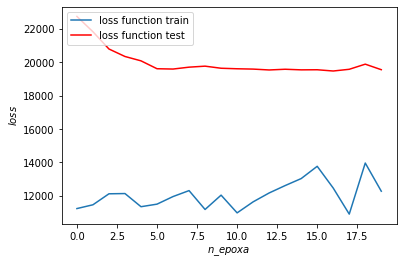

In [182]:
plt.plot(train_loss_history, label='loss function train') # график убывания loss функции от номера эпохи
plt.plot(test_loss_history, label='loss function test', c='r')
plt.legend(loc='upper left')
plt.xlabel('$n\_epoxa$')
plt.ylabel('$loss$')

Не сходится((

# Мои выводы
1) Всё, что написали, как видим из графика выше не заработало и loss функция на трейне не падает((( (где ошибка я не знаю, мб неправильно считаю градиент, но вроде бы всё перепроверяла) 

2) столкнулась с проблемой, что данные не влезали в память для потчёта и пришлось разбивать на batch

3) наверное, нужно использовать регуляризацию и проблема в том, что не сходится состоит именно в этом, но не успела попробовать, да и нет идей, как тут это делать
